# The Oxford Catalogue of Opioids  

#### This notebook visualises the extracted data for the searches and pharmacology data of 228 opioid drugs, more details about this research is available on our OSF project page [here](https://osf.io/2ph6c/). 

In [1]:
# import libraries required for analysis 
import numpy as np
import pandas as pd
from pylab import savefig
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Phase 1: The list of opioid drugs and their nomenclature 

In [2]:
# importing data for phase 1 - the list of 228 opioid drugs 
df1 = pd.read_csv("phase1_oxcatop.csv",thousands=',')

In [3]:
df1.head()

,drug_name,ATC,ATC_code,ATC_cat,BNF,BNF_code,BNF_cat,guide_to_pharmacol,INCB,Merck_index,Martindale,INN,INN_name,BAN,USAN,IUPAC_name,suffix
0,3-methylfentanyl,0,NaN,NaN,0,NaN,NaN,0,1,0,0,0,NaN,NaN,NaN,N-[3-methyl-1-(2-phenylethyl)piperidin-4-yl]-N...,anyl
1,3-methylthiofentanyl,0,NaN,NaN,0,NaN,NaN,0,1,0,0,0,NaN,NaN,NaN,N-[3-methyl-1-(2-thiophen-2-ylethyl)piperidin-...,anyl
2,4-chloroisobutyrfentanyl,0,NaN,NaN,0,NaN,NaN,0,0,0,0,0,NaN,NaN,NaN,2-Methyl-N-(4-chlorophenyl)-N-[1-(1-phenylprop...,anyl
3,4-fluoroisobutyrfentanyl,0,NaN,NaN,0,NaN,NaN,0,1,0,0,0,NaN,NaN,NaN,N-(4-Fluorophenyl)-N-[1-(2-phenylethyl)-4-pipe...,anyl
4,4-phenylfentanyl,0,NaN,NaN,0,NaN,NaN,0,0,0,0,0,NaN,NaN,NaN,N-Phenyl-N-[4-phenyl-1-(2-phenylethyl)piperidi...,anyl


In [4]:
df1.sum()

drug_name             3-methylfentanyl3-methylthiofentanyl4-chlorois...
ATC                                                                  58
BNF                                                                  32
guide_to_pharmacol                                                   59
INCB                                                                121
Merck_index                                                         111
Martindale                                                           69
INN                                                                 170
suffix                anylanylanylanylanyldolehine eineanyladolanyl-...
dtype: object

In [5]:
# percentage of drugs in each drug source
(df1['INN'].value_counts()/df1['INN'].count())*100

1    74.561404
0    25.438596
Name: INN, dtype: float64

In [6]:
(df1['INCB'].value_counts()/df1['INCB'].count())*100

1    53.070175
0    46.929825
Name: INCB, dtype: float64

In [7]:
(df1['Merck_index'].value_counts()/df1['Merck_index'].count())*100

0    51.315789
1    48.684211
Name: Merck_index, dtype: float64

In [8]:
(df1['Martindale'].value_counts()/df1['Martindale'].count())*100

0    69.736842
1    30.263158
Name: Martindale, dtype: float64

In [9]:
(df1['guide_to_pharmacol'].value_counts()/df1['guide_to_pharmacol'].count())*100

0    74.122807
1    25.877193
Name: guide_to_pharmacol, dtype: float64

In [10]:
(df1['ATC'].value_counts()/df1['ATC'].count())*100

0    74.561404
1    25.438596
Name: ATC, dtype: float64

In [11]:
(df1['BNF'].value_counts()/df1['BNF'].count())*100

0    85.964912
1    14.035088
Name: BNF, dtype: float64

In [12]:
# creating a new variable to sum the 7 data sources 
df1['sources'] = df1['ATC'] + df1['BNF'] + df1['guide_to_pharmacol'] + df1['INCB'] + df1['Merck_index'] + df1['Martindale'] + df1['INN']

In [13]:
df1.describe()

,ATC,BNF,guide_to_pharmacol,INCB,Merck_index,Martindale,INN,sources
count,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000
mean,0.254386,0.140351,0.258772,0.530702,0.486842,0.302632,0.745614,2.719298
std,0.436474,0.348115,0.438924,0.500155,0.500927,0.460408,0.436474,1.977890
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


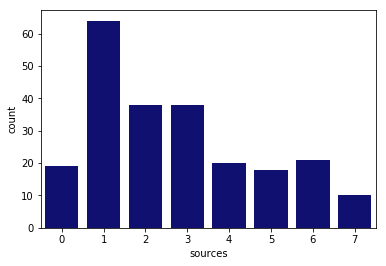

In [14]:
# visualising the spread of data to check the median is the best measure
ax = sns.countplot(data=df1, x="sources", color="navy")

In [15]:
# importing new dataframe for figure of seven data sources 
df2 = pd.read_csv("oxcat_databases.csv",thousands=',')
df2.head()

,databases,opioids
0,INN,170
1,INCB,121
2,Merck,111
3,Martindale,69
4,Guide to Pharmacology,59


In [16]:
df2.describe()

,opioids
count,7.000000
mean,88.571429
std,47.570499
min,32.000000
25%,58.500000
50%,69.000000
75%,116.000000
max,170.000000


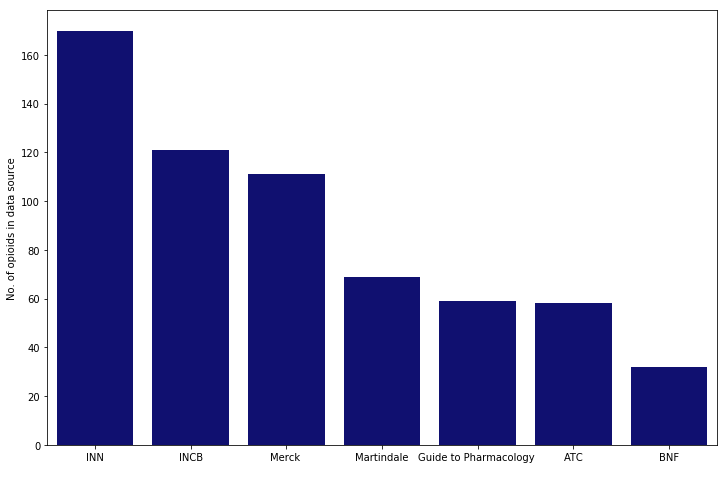

In [17]:
# ploting data as a bar graph using seaborn
plt.figure(figsize=(12,8))
ax = sns.barplot(data=df2, x="databases", y="opioids", color="navy")
plt.xlabel(' ')
plt.ylabel('No. of opioids in data source')

plt.savefig("databases.png", dpi=600)

In [18]:
# determining the number of unique suffixes 
df1['suffix'].nunique()

40

In [19]:
# the breakdown of the number of drugs in each suffix subgroup 
df1['suffix'].value_counts()

anyl      44
dine      29
hine      23
cine      18
adol      15
mide       9
line       9
done       8
phan       8
-          7
anol       7
hone       5
zine       5
xone       5
eine       5
tene       3
inol       2
zene       2
none       2
tine       2
phine      1
mine       1
xime       1
dole       1
late       1
hene       1
fene       1
vine       1
opon       1
acon       1
pine       1
etyl       1
oxin       1
iram       1
etum       1
opan       1
pium       1
egol       1
fine       1
aine       1
Name: suffix, dtype: int64

In [20]:
# the percentage of drugs in each suffix subgroup 
(df1['suffix'].value_counts()/df1['suffix'].count())*100

anyl      19.298246
dine      12.719298
hine      10.087719
cine       7.894737
adol       6.578947
mide       3.947368
line       3.947368
done       3.508772
phan       3.508772
-          3.070175
anol       3.070175
hone       2.192982
zine       2.192982
xone       2.192982
eine       2.192982
tene       1.315789
inol       0.877193
zene       0.877193
none       0.877193
tine       0.877193
phine      0.438596
mine       0.438596
xime       0.438596
dole       0.438596
late       0.438596
hene       0.438596
fene       0.438596
vine       0.438596
opon       0.438596
acon       0.438596
pine       0.438596
etyl       0.438596
oxin       0.438596
iram       0.438596
etum       0.438596
opan       0.438596
pium       0.438596
egol       0.438596
fine       0.438596
aine       0.438596
Name: suffix, dtype: float64

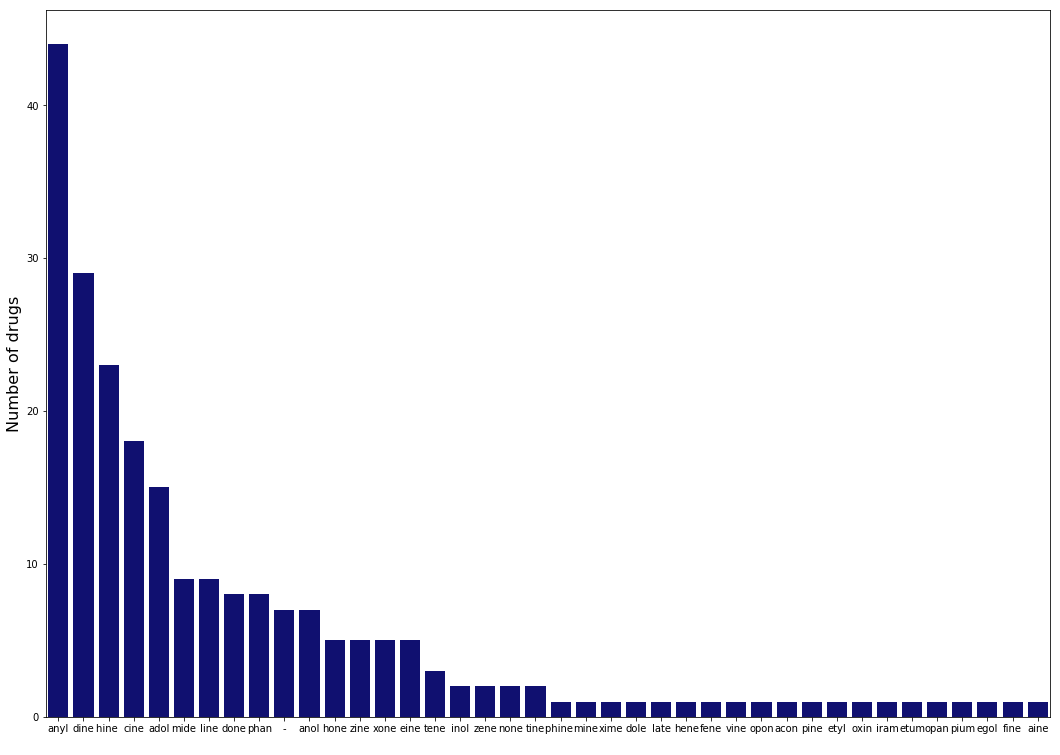

In [21]:
# plotting the number of suffixes using seaborn
plt.figure(figsize=(18,13))
ax = sns.countplot(data=df1, 
                   x="suffix", 
                   color="navy",
                   order=df1['suffix'].value_counts().index)
plt.xlabel(' ')
plt.ylabel('Number of drugs', fontsize=16)

plt.savefig("fig_suffix.png", dpi=600)

### Phase 2: Cataloging of opioids by pharmacology properties   

In [22]:
# importing data for phase 2 - pharmacology data 
df3 = pd.read_csv("phase2_oxcatop.csv",thousands=',')

In [23]:
df3.head()

,drug_name,molecular_formula,mole_weight_g_mol​,MOP,effect_MOP,DOP,effect_DOP,KOP,effect_KOP,NOP,effect_NOP,class
0,3-methylfentanyl,C23H30N2O,350.50,1.0,agonist,1.0,agonist,1.0,agonist,0.0,NaN,synthetic
1,3-methylthiofentanyl,C21H28N2OS,356.50,1.0,agonist,1.0,agonist,1.0,agonist,0.0,NaN,synthetic
2,4-chloroisobutyrfentanyl,C23H29ClN2O,384.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,synthetic
3,4-fluoroisobutyrfentanyl,C23H29FN2O,368.50,1.0,agonist,NaN,NaN,NaN,NaN,NaN,NaN,synthetic
4,4-phenylfentanyl,\tC28H32N2O,412.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,synthetic


In [24]:
# calculating the median for molecular weight 
df3.describe()

,mole_weight_g_mol​,MOP,DOP,KOP,NOP
count,226.000000,137.000000,80.000000,82.000000,10.000000
mean,351.319912,0.948905,0.700000,0.829268,0.400000
std,89.113638,0.220999,0.461149,0.378590,0.516398
min,221.340000,0.000000,0.000000,0.000000,0.000000
25%,297.825000,1.000000,0.000000,1.000000,0.000000
50%,342.400000,1.000000,1.000000,1.000000,0.000000
75%,386.187500,1.000000,1.000000,1.000000,1.000000
max,960.500000,1.000000,1.000000,1.000000,1.000000


In [25]:
# percentage of missing data - MOP receptor
(137/228)*100

60.08771929824561

In [26]:
# percentage of missing data - DOP receptor
(80/228)*100

35.08771929824561

In [27]:
# percentage of missing data - KOP receptor
(82/228)*100

35.96491228070175

In [28]:
# percentage of missing data - NOP receptor
(10/228)*100

4.385964912280701

In [29]:
# determining the total for each receptor 
df3.sum()

drug_name             3-methylfentanyl3-methylthiofentanyl4-chlorois...
mole_weight_g_mol​                                              79398.3
MOP                                                                 130
DOP                                                                  56
KOP                                                                  68
NOP                                                                   4
class                 syntheticsyntheticsyntheticsyntheticsynthetics...
dtype: object

In [30]:
# the breakdown of the number of drugs in each suffix subgroup 
df3['effect_MOP'].value_counts()

agonist            104
antagonist          14
partial agonist      8
mixed                4
Name: effect_MOP, dtype: int64

In [31]:
df3['effect_DOP'].value_counts()

agonist            41
antagonist         11
partial agonist     3
mixed               1
Name: effect_DOP, dtype: int64

In [32]:
df3['effect_KOP'].value_counts()

agonist            46
antagonist         12
partial agonist     8
mixed               1
unknown             1
Name: effect_KOP, dtype: int64

In [33]:
df3['effect_NOP'].value_counts()

agonist            3
partial agonist    1
Name: effect_NOP, dtype: int64

In [34]:
# total agonists 
104 + 41 + 46 + 3

194

In [35]:
# percentage of agonists 
((104 + 41 + 46 + 3)/228) * 100

85.08771929824562

In [36]:
# total partial agonists 
8+3+8+1

20

In [37]:
# percentage of partial agonists 
((8+3+8+1)/228)*100

8.771929824561402

In [38]:
# total antagonists
14+11+12

37

In [39]:
# percentage of antagonits 
((14+11+12)/228)*100

16.228070175438596

In [40]:
# percentage of mixed receptors 
(6/228)*100

2.631578947368421

In [41]:
# opioid classes based on their origin of discovery or development
df3['class'].value_counts()

synthetic         184
semi-synthetic     36
alkaloid            8
Name: class, dtype: int64

In [42]:
(df3['class'].value_counts()/df3['class'].count())*100

synthetic         80.701754
semi-synthetic    15.789474
alkaloid           3.508772
Name: class, dtype: float64